**TASK 3 - CAR PRICE PREDICTION WITH MACHINE LEARNING**

*BY INTERN GOWRI SM*

IMPORTING LIBRARIES FOR DATA VISUALIZATION AND DATA MANIPULATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LOADING THE DATASET

In [2]:
# Load dataset
df = pd.read_csv("/content/car data.csv")

In [35]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,4.75,9.54,43000,0,11,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,7.25,9.85,6900,0,7,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,2.85,4.15,5200,0,13,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4.60,6.87,42450,0,10,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


OVERVIEW OF THE DATASET

In [28]:
# Data Overview
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Selling_Price            301 non-null    float64
 1   Present_Price            301 non-null    float64
 2   Driven_kms               301 non-null    int64  
 3   Owner                    301 non-null    int64  
 4   Car_Age                  301 non-null    int64  
 5   Fuel_Type_Diesel         301 non-null    float64
 6   Fuel_Type_Petrol         301 non-null    float64
 7   Selling_type_Individual  301 non-null    float64
 8   Transmission_Manual      301 non-null    float64
 9   Fuel_Type_Diesel         301 non-null    float64
 10  Fuel_Type_Petrol         301 non-null    float64
 11  Selling_type_Individual  301 non-null    float64
 12  Transmission_Manual      301 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 30.7 KB
None


In [29]:
print(df.describe())

       Selling_Price  Present_Price     Driven_kms       Owner     Car_Age  \
count     301.000000     301.000000     301.000000  301.000000  301.000000   
mean        4.661296       7.628472   36947.205980    0.043189   10.372093   
std         5.082812       8.642584   38886.883882    0.247915    2.891554   
min         0.100000       0.320000     500.000000    0.000000    6.000000   
25%         0.900000       1.200000   15000.000000    0.000000    8.000000   
50%         3.600000       6.400000   32000.000000    0.000000   10.000000   
75%         6.000000       9.900000   48767.000000    0.000000   12.000000   
max        35.000000      92.600000  500000.000000    3.000000   21.000000   

       Fuel_Type_Diesel  Fuel_Type_Petrol  Selling_type_Individual  \
count        301.000000        301.000000               301.000000   
mean           0.199336          0.794020                 0.352159   
std            0.400166          0.405089                 0.478439   
min            0.

CHECKING MISSING VALUES

In [30]:
print(df.isnull().sum())  # Check for missing values

Selling_Price              0
Present_Price              0
Driven_kms                 0
Owner                      0
Car_Age                    0
Fuel_Type_Diesel           0
Fuel_Type_Petrol           0
Selling_type_Individual    0
Transmission_Manual        0
Fuel_Type_Diesel           0
Fuel_Type_Petrol           0
Selling_type_Individual    0
Transmission_Manual        0
dtype: int64


In [7]:
df = df.drop(categorical_cols, axis=1).reset_index(drop=True)
df = pd.concat([df, categorical_encoded_df], axis=1)


DISTRIBUTION OF CAR SELLING PRICES

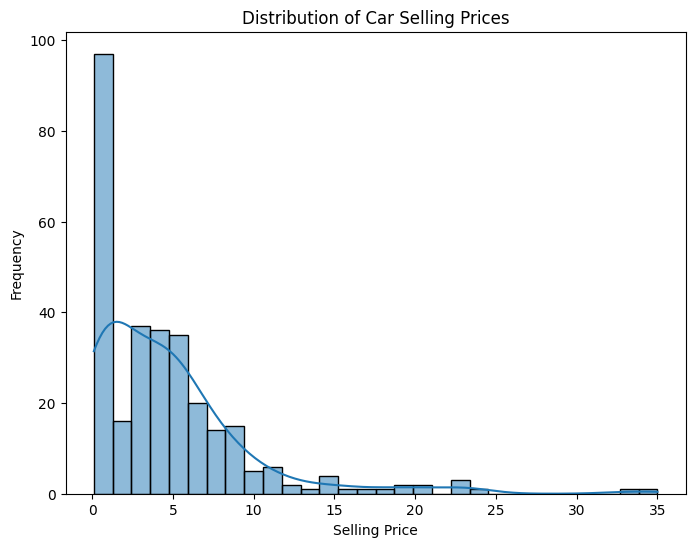

In [ ]:
# Distribution of Car Prices
plt.figure(figsize=(8, 6))
sns.histplot(df['Selling_Price'], bins=30, kde=True)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Selling Prices')
plt.show()


CORRELATION ANALYSIS

In [ ]:
print(df.corr())

                         Selling_Price  Present_Price  Driven_kms     Owner  \
Selling_Price                 1.000000       0.878914    0.029187 -0.088344   
Present_Price                 0.878914       1.000000    0.203618  0.008058   
Driven_kms                    0.029187       0.203618    1.000000  0.089216   
Owner                        -0.088344       0.008058    0.089216  1.000000   
Car_Age                      -0.236141       0.047192    0.524342  0.182104   
Fuel_Type_Diesel              0.552339       0.473390    0.172515 -0.053469   
Fuel_Type_Petrol             -0.540571      -0.465326   -0.172874  0.055687   
Selling_type_Individual      -0.550724      -0.512121   -0.101419  0.124269   
Transmission_Manual          -0.367128      -0.348776   -0.162510 -0.050316   
Fuel_Type_Diesel              0.552339       0.473390    0.172515 -0.053469   
Fuel_Type_Petrol             -0.540571      -0.465326   -0.172874  0.055687   
Selling_type_Individual      -0.550724      -0.51212

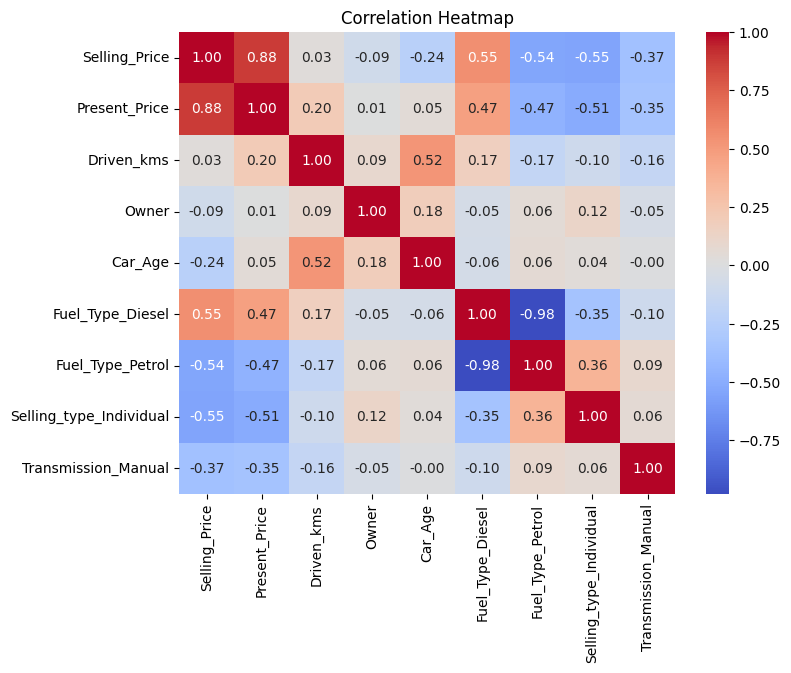

In [14]:
# Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


PRESENT PRICE VS SELLING PRICE

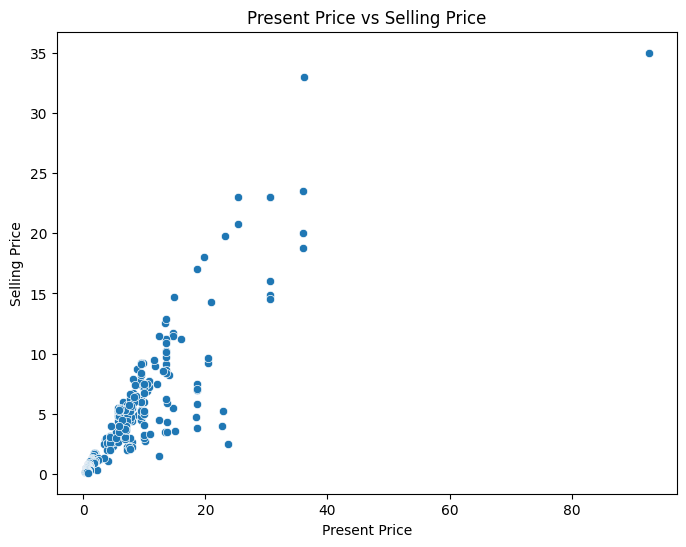

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Present_Price'], y=df['Selling_Price'])
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title('Present Price vs Selling Price')
plt.show()

In [41]:

if any(col in df.columns for col in categorical_cols):
  df = df.drop(categorical_cols, axis=1).reset_index(drop=True)

df = pd.concat([df, categorical_encoded_df], axis=1)

SELLING PRICE BY NUMBER OF OWNERS

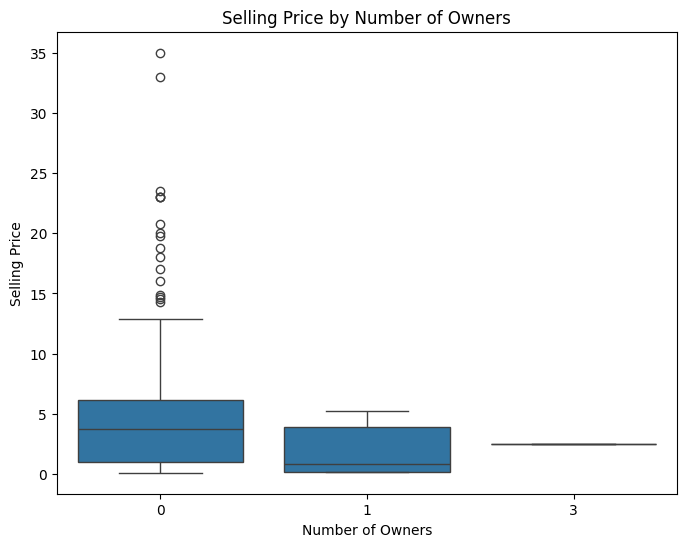

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Owner'], y=df['Selling_Price'])
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price by Number of Owners')
plt.show()


DISTRIBUTION BY KILOMETERS DRIVEN

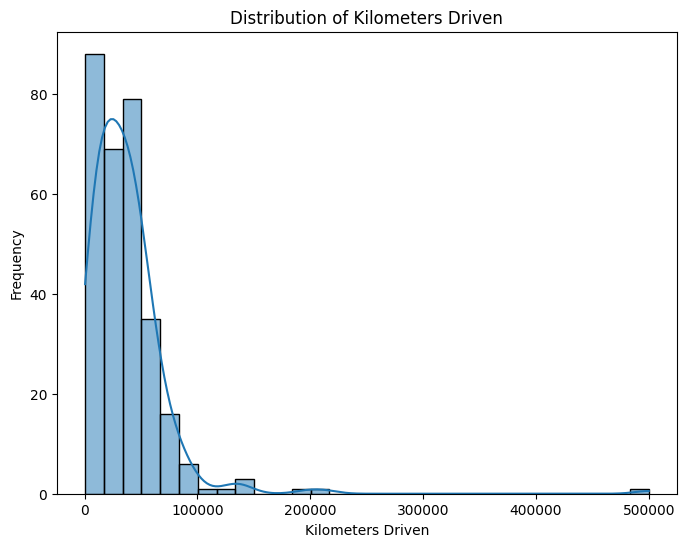

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Driven_kms'], bins=30, kde=True)
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.title('Distribution of Kilometers Driven')
plt.show()

MODEL TRAINING AND MODEL PREDICTION

In [ ]:
# Feature Engineering
df['Car_Age'] = 2024 - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)  # Drop non-informative columns

In [ ]:
# Encoding categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False) # Changed 'sparse' to 'sparse_output'
categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission']
categorical_encoded = encoder.fit_transform(df[categorical_cols])
categorical_encoded_df = pd.DataFrame(categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))

In [ ]:
# Splitting Data
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardizing numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

MODEL EVALUATION

In [ ]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [ ]:
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MAE: 0.6166737704918033
MSE: 0.8729097916393433
RMSE: 0.9342964152983481
R2 Score: 0.9621060281378809


ACTUAL VS PREDICTED PRICES

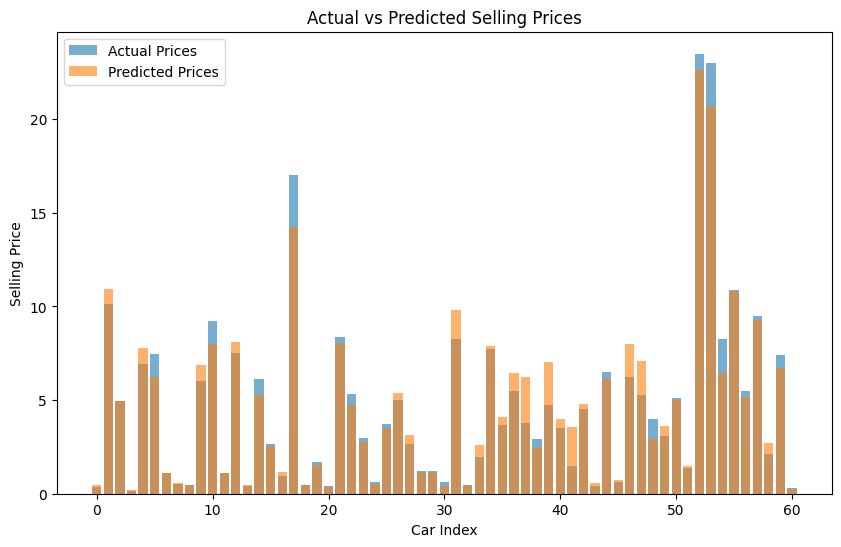

In [39]:
# Actual vs Predicted Selling Prices Bar Graph
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test)), y_test.values, label='Actual Prices', alpha=0.6)
plt.bar(range(len(y_pred)), y_pred, label='Predicted Prices', alpha=0.6)
plt.xlabel('Car Index')
plt.ylabel('Selling Price')
plt.title('Actual vs Predicted Selling Prices')
plt.legend()
plt.show()
